# Matplotlib avanzado

En este Notebook se explican algunas características un poco más avanzadas de Matplotlib que no se usan tan frecuentemente.

In [1]:
import matplotlib.pyplot as plt
%matplotlib inline

# Datos
import numpy as np
x = np.linspace(0, 5, 11) # 11 números entre 0 y 5, separados de forma uniforme
y = x ** 2

## Escala logarítmica

También es posible establecer una escala logarítmica para uno o ambos ejes. Esta funcionalidad es, de hecho, solo una aplicación de un sistema de transformación más general en Matplotlib. Cada una de las escalas de los ejes se establece por separado utilizando los métodos `set_xscale` y `set_yscale` que aceptan un parámetro (con el valor "log" en este caso):


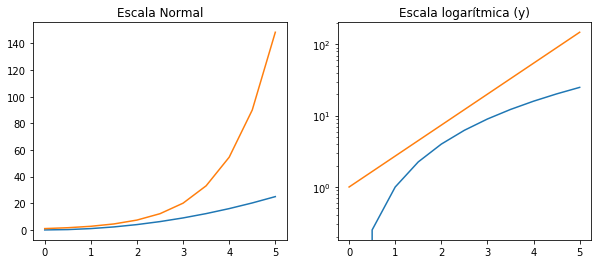

In [2]:
fig, axes = plt.subplots(1, 2, figsize=(10,4))
      
axes[0].plot(x, x**2, x, np.exp(x))
axes[0].set_title("Escala Normal")

axes[1].plot(x, x**2, x, np.exp(x))
axes[1].set_yscale("log")
axes[1].set_title("Escala logarítmica (y)");

## Colocación de marcas y etiquetas personalizadas

Podemos determinar explícitamente dónde queremos las marcas (ticks) de los ejes con `set_xticks` y` set_yticks`, que toman una lista de valores de dónde se colocarán los ticks en el eje. También podemos usar los métodos `set_xticklabels` y` set_yticklabels` para proporcionar una lista de etiquetas de texto personalizadas para cada ubicación de las marcas:

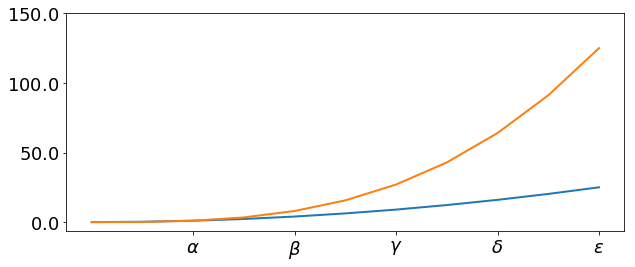

In [3]:
fig, ax = plt.subplots(figsize=(10, 4))

ax.plot(x, x**2, x, x**3, lw=2)

ax.set_xticks([1, 2, 3, 4, 5])
ax.set_xticklabels([r'$\alpha$', r'$\beta$', r'$\gamma$', r'$\delta$', r'$\epsilon$'], fontsize=18) # usa formato LaTeX

yticks = [0, 50, 100, 150]
ax.set_yticks(yticks)
ax.set_yticklabels(["$%.1f$" % y for y in yticks], fontsize=18); # usa formato LaTeX

Hay una serie de métodos más avanzados para controlar la colocación de marcas mayores y menores en las figuras de matplotlib, como la colocación automática de acuerdo con diferentes políticas. Ver http://matplotlib.org/api/ticker_api.html para más detalles.


## Notación científica

Muchas veces es mejor usar notación científica cuando tenemos números grandes en los ejes.

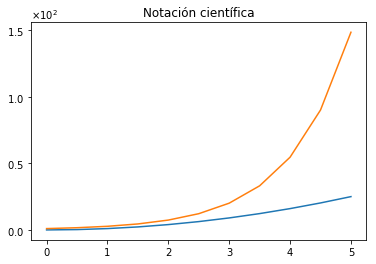

In [4]:
fig, ax = plt.subplots(1, 1)
      
ax.plot(x, x**2, x, np.exp(x))
ax.set_title("Notación científica")

ax.set_yticks([0, 50, 100, 150])

from matplotlib import ticker
formatter = ticker.ScalarFormatter(useMathText=True)
formatter.set_scientific(True) 
formatter.set_powerlimits((-1,1)) 
ax.yaxis.set_major_formatter(formatter) 

## Espaciado de las etiquetas de los ejes

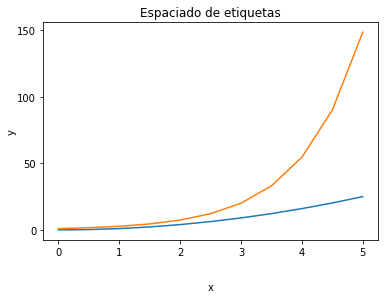

In [5]:
fig, ax = plt.subplots(1, 1)
      
ax.plot(x, x**2, x, np.exp(x))
ax.set_yticks([0, 50, 100, 150])

ax.set_title("Espaciado de etiquetas")

# espaciado entre números y etiquetas de los ejes
ax.xaxis.labelpad = 25
ax.yaxis.labelpad = 0

ax.set_xlabel("x")
ax.set_ylabel("y");

## Ajustes a la posición de los ejes

A veces cuando se guardan las figuras en archivos, las etiquetas de los ejes se recortan. Es necesario ajustar la posición de los ejes ligeramente. Esto se puede lograr con `subplots_adjust`:

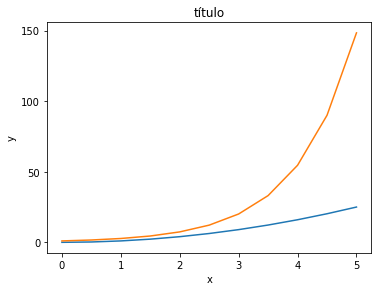

In [6]:
fig, ax = plt.subplots(1, 1)
      
ax.plot(x, x**2, x, np.exp(x))
ax.set_yticks([0, 50, 100, 150])

ax.set_title("título")
ax.set_xlabel("x")
ax.set_ylabel("y")

fig.subplots_adjust(left=0.15, right=.9, bottom=0.1, top=0.9);

## 'Grid' 

Con el método `grid` en el objeto del eje, podemos activar y desactivar las líneas de la grilla. También podemos personalizar el aspecto de las líneas de cuadrícula utilizando los mismos argumentos de palabra clave como la función `plot`:


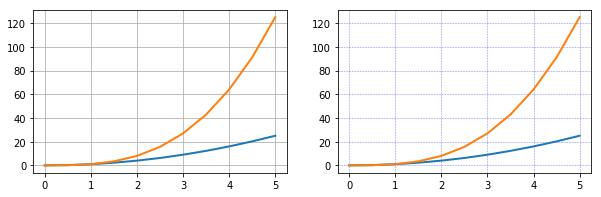

In [7]:
fig, axes = plt.subplots(1, 2, figsize=(10,3))

# default grid
axes[0].plot(x, x**2, x, x**3, lw=2)
axes[0].grid(True)

# grid personalizado
axes[1].plot(x, x**2, x, x**3, lw=2)
axes[1].grid(color='b', alpha=0.5, linestyle='dashed', linewidth=0.5)

   ## Estilo de ejes (spines)

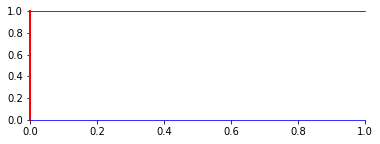

In [8]:
fig, ax = plt.subplots(figsize=(6,2))

ax.spines['bottom'].set_color('blue')
ax.spines['top'].set_color('blue')

ax.spines['left'].set_color('red')
ax.spines['left'].set_linewidth(2)

# desactivar eje a la derecha
ax.spines['right'].set_color("none")
ax.yaxis.tick_left() # solo ticks a la izquierda

## Ejes gemelos

Algunas veces es útil tener dos ejes x o y en una figura; por ejemplo, al trazar dos curvas con diferentes unidades. Matplotlib soporta esto con las funciones `twinx` y `twiny`:


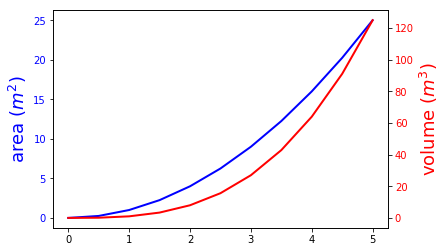

In [9]:
fig, ax1 = plt.subplots()

ax1.plot(x, x**2, lw=2, color="blue")
ax1.set_ylabel(r"area $(m^2)$", fontsize=18, color="blue")
for label in ax1.get_yticklabels():
    label.set_color("blue")
    
ax2 = ax1.twinx()
ax2.plot(x, x**3, lw=2, color="red")
ax2.set_ylabel(r"volume $(m^3)$", fontsize=18, color="red")
for label in ax2.get_yticklabels():
    label.set_color("red")

## Ejes donde `x` y `y` son cero

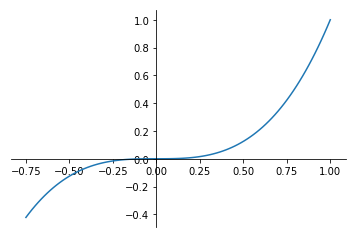

In [10]:
fig, ax = plt.subplots()

ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')

ax.xaxis.set_ticks_position('bottom')
ax.spines['bottom'].set_position(('data',0)) # configura la posición del eje x en x=0

ax.yaxis.set_ticks_position('left')
ax.spines['left'].set_position(('data',0))   # configura la posición del eje y en y=0

xx = np.linspace(-0.75, 1., 100)
ax.plot(xx, xx**3);

## Otros estilos de gráficos 2D

Además del método común 'plot', hay varias funciones para generar diferentes tipos de gráficos. Consulte la galería de matplotlib para obtener una lista completa: http://matplotlib.org/gallery.html. Algunos de los más útiles se muestran a continuación:

In [11]:
n = np.array([0,1,2,3,4,5])

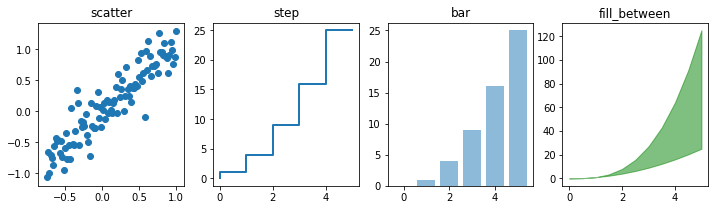

In [12]:
fig, axes = plt.subplots(1, 4, figsize=(12,3))

axes[0].scatter(xx, xx + 0.25*np.random.randn(len(xx)))
axes[0].set_title("scatter")

axes[1].step(n, n**2, lw=2)
axes[1].set_title("step")

axes[2].bar(n, n**2, align="center", width=0.8, alpha=0.5)
axes[2].set_title("bar")

axes[3].fill_between(x, x**2, x**3, color="green", alpha=0.5);
axes[3].set_title("fill_between");

## Anotaciones de texto

Se puede anotar texto en figuras matplotlib usando la función `text`. Es compatible con el formato LaTeX al igual que los textos y títulos de las etiquetas de ejes:

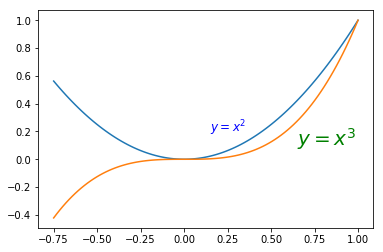

In [13]:
fig, ax = plt.subplots()

ax.plot(xx, xx**2, xx, xx**3)

ax.text(0.15, 0.2, r"$y=x^2$", fontsize=12, color="blue")
ax.text(0.65, 0.1, r"$y=x^3$", fontsize=20, color="green");

## Figuras múltiples 

Se pueden agregar manualmente ejes a una figura de Matplotlib usando `fig.add_axes` o usando un administrador de diseño de subfiguras como `subplots`, `subplot2grid`, o `gridspec`:

### subplots

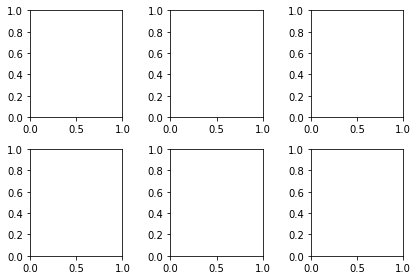

In [14]:
fig, ax = plt.subplots(2, 3)
fig.tight_layout()

#### subplot2grid

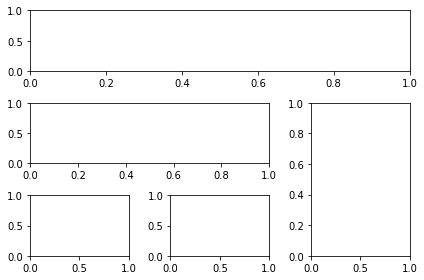

In [15]:
fig = plt.figure()
ax1 = plt.subplot2grid((3,3), (0,0), colspan=3)
ax2 = plt.subplot2grid((3,3), (1,0), colspan=2)
ax3 = plt.subplot2grid((3,3), (1,2), rowspan=2)
ax4 = plt.subplot2grid((3,3), (2,0))
ax5 = plt.subplot2grid((3,3), (2,1))
fig.tight_layout()

#### gridspec

In [16]:
import matplotlib.gridspec as gridspec

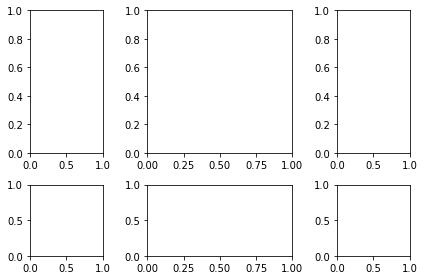

In [17]:
fig = plt.figure()

gs = gridspec.GridSpec(2, 3, height_ratios=[2,1], width_ratios=[1,2,1])
for g in gs:
    ax = fig.add_subplot(g)
    
fig.tight_layout()

#### add_axes

Agregar ejes manualmente con `add_axes` es útil para agregar inserciones a las figuras:

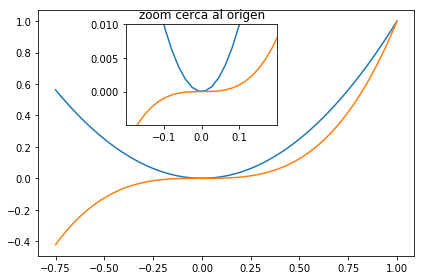

In [18]:
fig, ax = plt.subplots()

ax.plot(xx, xx**2, xx, xx**3)
fig.tight_layout()

# inserción
inset_ax = fig.add_axes([0.3, 0.55, 0.35, 0.35]) # X, Y, width, height

inset_ax.plot(xx, xx**2, xx, xx**3)
inset_ax.set_title('zoom cerca al origen')

# rango del eje
inset_ax.set_xlim(-.2, .2)
inset_ax.set_ylim(-.005, .01)

# ubicación de las marcas del eje
inset_ax.set_yticks([0, 0.005, 0.01])
inset_ax.set_xticks([-0.1,0,.1]);

## Figuras de mapas de color y contornos

Los mapas de colores y las figuras de contorno son útiles para graficar funciones de dos variables. En la mayoría de estas funciones, utilizaremos un mapa de colores para codificar una dimensión de los datos. Hay una serie de mapas de color predefinidos. Es relativamente sencillo definir mapas de color personalizados. Para obtener una lista de mapas de color predefinidos, consulte: http://www.scipy.org/Cookbook/Matplotlib/Show_colormaps

In [19]:
import matplotlib
alpha = 0.7
phi_ext = 2 * np.pi * 0.5

def flux_qubit_potential(phi_m, phi_p):
    return 2 + alpha - 2 * np.cos(phi_p) * np.cos(phi_m) - alpha * np.cos(phi_ext - 2*phi_p)

In [20]:
phi_m = np.linspace(0, 2*np.pi, 100)
phi_p = np.linspace(0, 2*np.pi, 100)
X,Y = np.meshgrid(phi_p, phi_m)
Z = flux_qubit_potential(X, Y).T

### pcolor

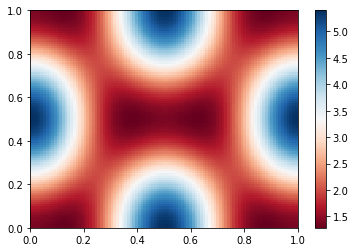

In [21]:
fig, ax = plt.subplots()

p = ax.pcolor(X/(2*np.pi), Y/(2*np.pi), Z, cmap=matplotlib.cm.RdBu, vmin=abs(Z).min(), vmax=abs(Z).max())
cb = fig.colorbar(p, ax=ax)

### imshow

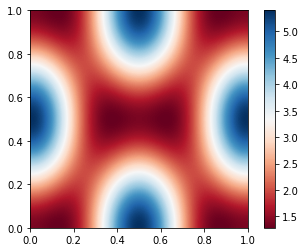

In [22]:
fig, ax = plt.subplots()

im = ax.imshow(Z, cmap=matplotlib.cm.RdBu, vmin=abs(Z).min(), vmax=abs(Z).max(), extent=[0, 1, 0, 1])
im.set_interpolation('bilinear')

cb = fig.colorbar(im, ax=ax)

#### contour

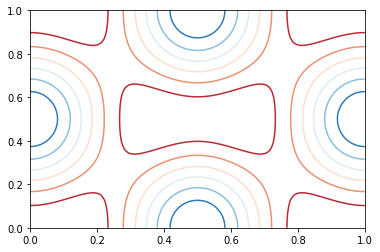

In [23]:
fig, ax = plt.subplots()

cnt = ax.contour(Z, cmap=matplotlib.cm.RdBu, vmin=abs(Z).min(), vmax=abs(Z).max(), extent=[0, 1, 0, 1])

## Figuras 3D

Para usar gráficos 3D en matplotlib, primero necesitamos crear una instancia de la clase `Axes3D`. Los ejes 3D se pueden agregar a un canvas de figuras matplotlib exactamente de la misma manera que los ejes 2D; o, más convenientemente, pasando un argumento de palabra clave `projection='3d'` a los métodos` add_axes` o `add_subplot`.

In [24]:
from mpl_toolkits.mplot3d.axes3d import Axes3D

### Superficies

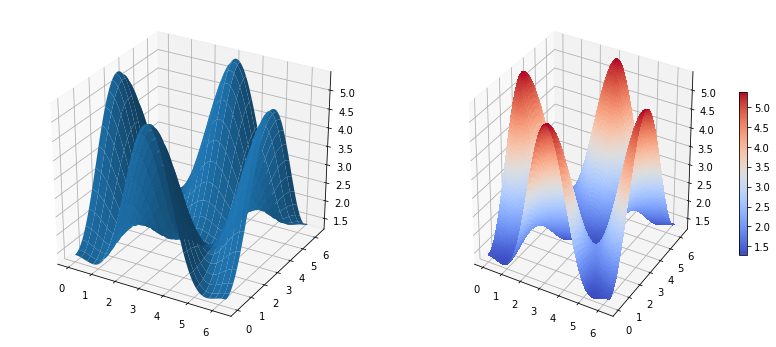

In [25]:
fig = plt.figure(figsize=(14,6))

# `ax` es un eje 3D por el parámetro projection='3d' en add_subplot
ax = fig.add_subplot(1, 2, 1, projection='3d')

p = ax.plot_surface(X, Y, Z, rstride=4, cstride=4, linewidth=0)

# superficie con graduación de color y barra de color
ax = fig.add_subplot(1, 2, 2, projection='3d')
p = ax.plot_surface(X, Y, Z, rstride=1, cstride=1, cmap=matplotlib.cm.coolwarm, linewidth=0, antialiased=False)
cb = fig.colorbar(p, shrink=0.5)

### Gráfico "Wire-frame" 

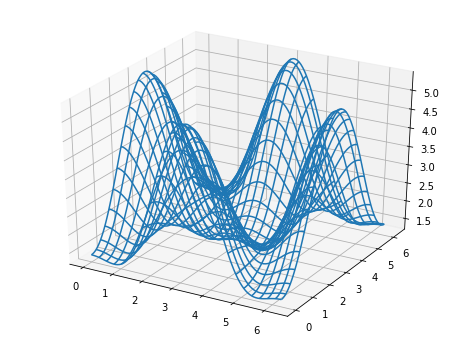

In [26]:
fig = plt.figure(figsize=(8,6))

ax = fig.add_subplot(1, 1, 1, projection='3d')

p = ax.plot_wireframe(X, Y, Z, rstride=4, cstride=4)

### Contornos con proyecciones

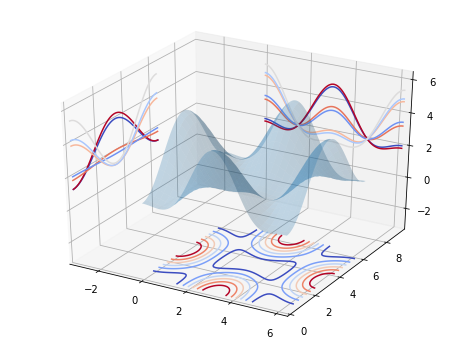

In [27]:
fig = plt.figure(figsize=(8,6))

ax = fig.add_subplot(1,1,1, projection='3d')

ax.plot_surface(X, Y, Z, rstride=4, cstride=4, alpha=0.25)
cset = ax.contour(X, Y, Z, zdir='z', offset=-np.pi, cmap=matplotlib.cm.coolwarm)
cset = ax.contour(X, Y, Z, zdir='x', offset=-np.pi, cmap=matplotlib.cm.coolwarm)
cset = ax.contour(X, Y, Z, zdir='y', offset=3*np.pi, cmap=matplotlib.cm.coolwarm)

ax.set_xlim3d(-np.pi, 2*np.pi);
ax.set_ylim3d(0, 3*np.pi);
ax.set_zlim3d(-np.pi, 2*np.pi);